# sigmoid函数

Text(0.5, 1.0, 'Sigmoid')

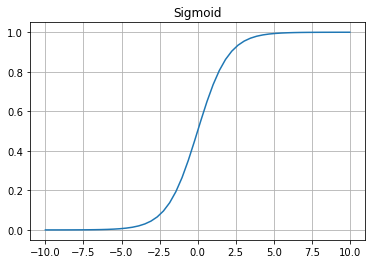

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
plt.figure()
plt.plot(x,y_sigmoid)
plt.grid()
plt.title('Sigmoid')

# 梯度上升算法

Text(0.5, 1.0, 'y=-x^2+4x')

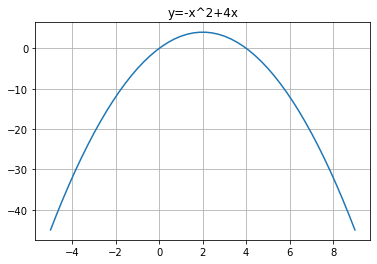

In [2]:
#画图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-5,9)
y = -x**2+4*x
plt.figure()
plt.plot(x,y)
plt.grid()
plt.title('y=-x^2+4x')

In [3]:
#梯度上升法更新参数
import matplotlib.pyplot as plt
import numpy as np
#f(x)的导数
def f_prime(x_old): 
    return -2 * x_old + 4

x_old = 3#初始值
alpha = 0.001#学习速率，控制更新的幅度
for i in range(10000):
    x_new = x_old +alpha * f_prime(x_old)#上面提到的公式
    x_old = x_new
print(x_new)

2.0000000020202866


# 逻辑回归的python实现

## 查看数据

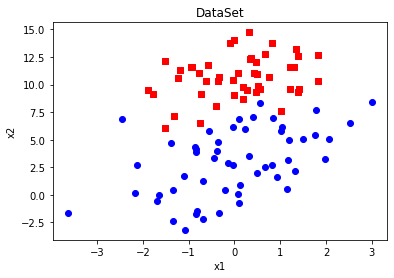

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data=pd.read_csv(r"D:\CDA\File\testSet.txt",sep='	',names=['x1','x2','y'])
data['x0']=1
feature=data[['x0','x1','x2']]
label=data['y']

#0类数据
data0=data[data['y']==0]
#1类数据
data1=data[data['y']==1]


fig = plt.figure()                                          
plt.scatter(data0['x1'],data0['x2'],c = 'red', marker = 's')#绘制负样本
plt.scatter(data1['x1'],data1['x2'],c = 'blue')#绘制正样本
plt.title('DataSet')                                                #绘制title
plt.xlabel('x1'); plt.ylabel('x2')                                    #绘制label
plt.show() 

## 梯度上升算法求解系数

In [6]:
import numpy as np
import pandas as pd
#加载数据
data=pd.read_csv(r"D:\CDA\File\testSet.txt",sep='	',names=['x1','x2','y'])
data['x0']=1
feature=data[['x0','x1','x2']]
label=data['y']
feature=np.mat(feature)
label=np.mat(label).T

#sigmoid函数
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

#梯度上升
def gradAscent(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)              #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                            #学习速率,控制更新的幅度。
    maxCycles = 100000                          #最大迭代次数
    weights = np.mat(np.ones((n,1)))                 #初始化，3行，一列
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)          #梯度上升矢量化公式
        error = classLabels - h
        weights = weights + alpha * dataMatrix.T * error
    return weights                        #将矩阵转换为数组，返回权重数组

#主函数    
weights=gradAscent(feature, label)
print(weights)

[[14.72593649]
 [ 1.25180727]
 [-1.99917231]]


## 预测

In [7]:
data=np.mat([[1,0,10],[1,-1,15],[1,0,0],[1,1,0]])#预测
h1 = sigmoid(data* weights) #1，为正样本的概率
print(h1)
h2=1-np.array(h1)#0，为负样本的概率
print(h2)

[[5.13878466e-03]
 [6.73437633e-08]
 [9.99999598e-01]
 [9.99999885e-01]]
[[9.94861215e-01]
 [9.99999933e-01]
 [4.02352652e-07]
 [1.15067852e-07]]


## 画最优决策边界

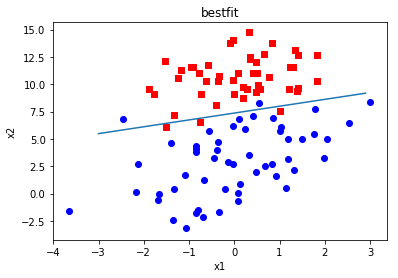

In [9]:
fig = plt.figure()                                          #添加subplot
plt.scatter(data0['x1'],data0['x2'], c = 'red', marker = 's')#绘制负样本
plt.scatter(data1['x1'],data1['x2'], c = 'blue')#正类

weights=weights.getA()#矩阵转换为数组
x1 = np.arange(-3.0, 3.0, 0.1)
x2 = (-weights[0] - weights[1] * x1) / weights[2]    #sigmod函数x=0处为最佳分界
plt.plot(x1, x2)
plt.title('bestfit')                                                #绘制title
plt.xlabel('x1'); plt.ylabel('x2')                                    #绘制label
plt.show() 

# sklearn中的逻辑回归

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression()
clf.fit(X, y)#训练
clf.predict(X[:10, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
clf.predict_proba(X[:2, :]) #输出分类的概率

array([[8.78030305e-01, 1.21958900e-01, 1.07949250e-05],
       [7.97058292e-01, 2.02911413e-01, 3.02949242e-05]])

In [6]:
clf.score(X, y)#评分，准确率  先预测得到结果，得到结果和真实结果进行比较

0.96

In [9]:
from sklearn import metrics
print(metrics.classification_report(y, clf.predict(X)))#分类报告

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [19]:
print(metrics.confusion_matrix(y, clf.predict(X)))#混淆矩阵

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# 病马死亡率预测

## 读取数据

In [10]:
#病马死亡率预测
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

train_data=pd.read_csv("D:\CDA\File\horseColicTraining.txt",sep='	',names=range(22))
trainingSet=train_data.iloc[:,0:21]#特征
trainingLabels=train_data.iloc[:,21:]#label

test_data=pd.read_csv("D:\CDA\File\horseColicTest.txt",sep='	')
testSet=test_data.iloc[:,0:21]
testLabels=test_data.iloc[:,21:]

In [11]:
classifier = LogisticRegression().fit(trainingSet, trainingLabels)
classifier.score(testSet,testLabels)

0.7272727272727273

## 网格搜索优化参数

In [16]:
from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],'C':[0.001,0.01,0.1,1,10,100]}#粗调节
LR = LogisticRegression()
grid_search=GridSearchCV(LR,param_grid=params,cv=5)
grid_search.fit(trainingSet, trainingLabels)
grid_search.best_params_

D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.01, 'penalty': 'l2'}

In [17]:
grid_search.score(testSet,testLabels) # 准确率

0.7727272727272727

In [20]:
predicted=grid_search.predict(testSet)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])

In [21]:
print(metrics.classification_report(testLabels, predicted))#打印分类报告

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.84      0.83      0.84        46

    accuracy                           0.77        66
   macro avg       0.73      0.74      0.73        66
weighted avg       0.78      0.77      0.77        66



In [22]:
print(metrics.confusion_matrix(testLabels, predicted))#混淆矩阵

[[13  7]
 [ 8 38]]


In [24]:
predict_proba=grid_search.predict_proba(testSet)
predict_proba#输出概率

array([[0.23035634, 0.76964366],
       [0.25557808, 0.74442192],
       [0.3189303 , 0.6810697 ],
       [0.37315834, 0.62684166],
       [0.27533668, 0.72466332],
       [0.3220244 , 0.6779756 ],
       [0.31053544, 0.68946456],
       [0.25688018, 0.74311982],
       [0.69029542, 0.30970458],
       [0.33215018, 0.66784982],
       [0.83902432, 0.16097568],
       [0.72434789, 0.27565211],
       [0.44495405, 0.55504595],
       [0.4076825 , 0.5923175 ],
       [0.39261232, 0.60738768],
       [0.29418048, 0.70581952],
       [0.58817854, 0.41182146],
       [0.90326071, 0.09673929],
       [0.32127228, 0.67872772],
       [0.62632681, 0.37367319],
       [0.36411524, 0.63588476],
       [0.6593977 , 0.3406023 ],
       [0.71105355, 0.28894645],
       [0.13677332, 0.86322668],
       [0.30154981, 0.69845019],
       [0.15688331, 0.84311669],
       [0.47282615, 0.52717385],
       [0.25136013, 0.74863987],
       [0.30613447, 0.69386553],
       [0.19455561, 0.80544439],
       [0.

In [25]:
predict_proba.shape

(66, 2)

## ROC曲线绘制

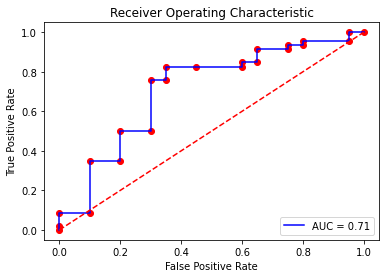

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
false_positive_rate, true_positive_rate, thresholds = roc_curve(testLabels, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)

plt.scatter(false_positive_rate, true_positive_rate,c='r')

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
thresholds

array([1.87371741, 0.87371741, 0.86052125, 0.84807877, 0.72466332,
       0.70707448, 0.6867158 , 0.67872772, 0.58772474, 0.58516102,
       0.52717385, 0.41222965, 0.40774048, 0.4061432 , 0.374996  ,
       0.36934804, 0.3406023 , 0.31974175, 0.30970458, 0.29386413,
       0.16097568, 0.10957236, 0.09673929])

In [25]:
import pandas as pd
df=pd.DataFrame()
df['proba']=predict_proba[:,1]
df['real-label']=testLabels
df.sort_values(by='proba',ascending=False).head(20)

,proba,real-label
38,0.873717,1
53,0.870675,1
23,0.863227,1
47,0.860521,1
51,0.852944,0
50,0.848079,0
25,0.843117,1
37,0.839649,1
62,0.816224,1
29,0.805444,1


In [26]:
false_positive_rate

array([0.  , 0.  , 0.  , 0.1 , 0.1 , 0.2 , 0.2 , 0.3 , 0.3 , 0.35, 0.35,
       0.45, 0.6 , 0.6 , 0.65, 0.65, 0.75, 0.75, 0.8 , 0.8 , 0.95, 0.95,
       1.  ])

# 手写数字识别

In [28]:
#逻辑回归手写数字识别, 0,1,2, 9
import os
os.chdir('D:\\CDA\\File')
import numpy as np
from os import listdir
from sklearn.linear_model import LogisticRegression
 
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    return returnVect
 

#训练集
hwLabels = []                                       #测试集的Labels，后面用来比对计算错误率
trainingFileList = listdir('trainingDigits')        #listdir()是返回目录下的文件名
m = len(trainingFileList)                           #返回文件夹下文件的个数
trainingMat = np.zeros((m, 1024)) #1934x1024  #初始化训练的Mat矩阵,测试集，就是批量处理
for i in range(m):                                  #从文件名中解析出训练集的类别
    fileNameStr = trainingFileList[i]               #获得文件的名字；是为了下一步获取每个文件的数字类别
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字；因为分隔后的第一个是代表类别的数字
    hwLabels.append(classNumber)                    #将获得的类别添加到hwLabels中
    trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))     #将每一个文件的1x1024数据存储到trainingMat矩阵中，trainingMat最后是m行1024列的矩阵

#测试集   
testFileList = listdir('testDigits')                #返回testDigits目录下的文件列表   同样也要对测试集进行相同的处理
testLabels = [] 
mTest = len(testFileList)                           #测试数据的数量
testMat = np.zeros((mTest, 1024)) 
for i in range(mTest):                              #从文件中解析出测试集的类别并进行分类测试  
    fileNameStr = testFileList[i]                   #获得文件的名字
    classNumber = int(fileNameStr.split('_')[0])    #获得分类的数字
    testLabels.append(classNumber) 
    testMat[i,:] = img2vector('testDigits/%s' % (fileNameStr))     #获得测试集的1x1024向量,用于训练   
    
classifier = LogisticRegression().fit(trainingMat, hwLabels)
classifier.score(testMat, testLabels)#准确率

0.9661733615221987

In [31]:
trainingMat.shape

(1934, 1024)

In [32]:
len(hwLabels)

1934

In [32]:
#参数优化
params={'C':[0.4,0.5,0.6,0.7,0.8,0.9]}
clf = LogisticRegression(solver ='newton-cg',multi_class ='multinomial')
grid_search=GridSearchCV(clf,param_grid=params,cv=5)
grid_search.fit(trainingMat, hwLabels)
grid_search.score(testMat, testLabels)

0.9714587737843552

In [33]:
print(grid_search.best_params_)

{'C': 0.5}
